In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

data_dir =r'D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\Noises Inpainting\result train'
os.listdir(data_dir)

['cancer', 'normal']

In [3]:
train_dt = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    validation_split = 0.4
)

In [4]:
#Augmentasi gambar
train_dt_generator = train_dt.flow_from_directory(
    data_dir,
    target_size=(224,224),
    shuffle=True,
    subset= 'training'
)

validation_dt_generator= train_dt.flow_from_directory(
    data_dir,
    target_size=(224,224),
    subset= 'validation'
)

Found 2857 images belonging to 2 classes.
Found 1903 images belonging to 2 classes.


In [5]:
#Pemodelan Sequenstial
models = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')

])

models.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [6]:
#Meng-Compile model menggunakan loss function
models.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
model = models.fit(
    train_dt_generator,
    steps_per_epoch=16,
    batch_size=4,
    epochs=30,
    validation_data=validation_dt_generator,
    validation_steps = 1
)

Epoch 1/30
16/16 [==============================] - 92s 6s/step - loss: 20.6327 - accuracy: 0.5059 - val_loss: 0.5769 - val_accuracy: 0.6875
Epoch 2/30
16/16 [==============================] - 86s 5s/step - loss: 0.5818 - accuracy: 0.6973 - val_loss: 0.6757 - val_accuracy: 0.5625
Epoch 3/30
16/16 [==============================] - 87s 5s/step - loss: 0.5619 - accuracy: 0.7559 - val_loss: 0.5619 - val_accuracy: 0.7188
Epoch 4/30
16/16 [==============================] - 88s 6s/step - loss: 0.5051 - accuracy: 0.7559 - val_loss: 1.0086 - val_accuracy: 0.4688
Epoch 5/30
16/16 [==============================] - 82s 5s/step - loss: 0.5837 - accuracy: 0.7637 - val_loss: 0.5500 - val_accuracy: 0.6875
Epoch 6/30
16/16 [==============================] - 75s 5s/step - loss: 0.4533 - accuracy: 0.8086 - val_loss: 1.3319 - val_accuracy: 0.4062
Epoch 7/30
16/16 [==============================] - 75s 5s/step - loss: 0.3323 - accuracy: 0.8809 - val_loss: 0.8683 - val_accuracy: 0.5000
Epoch 8/30
16/16 [=

In [11]:
print(model.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


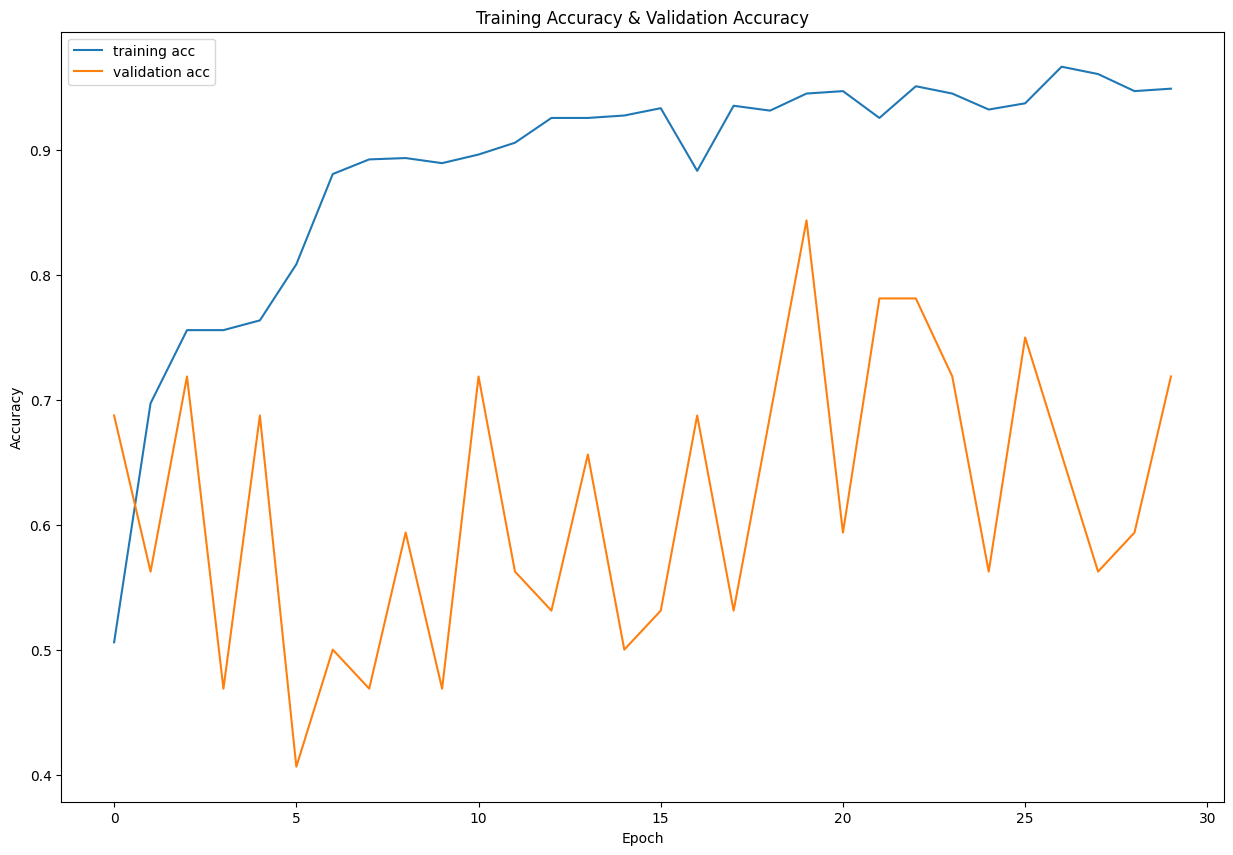

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(model.history["accuracy"],label = "training acc")
plt.plot(model.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
models.save("bcancer_modelv3.h5")
